In [52]:
import ugradio
import numpy as np
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt

import pandas as pd
from scipy.optimize import curve_fit


# Doppler Velocity stuff

In [102]:
bb_data = pd.read_csv('cal_data.csv')
bb_f = bb_data['f'][93:1840]*1e-6
bb_a = bb_data['a'][93:1840]

sky_data = pd.read_csv('cal_test_data5.csv')
sky_f = sky_data['f'][93:1840]*1e-6
sky_a = sky_data['a'][93:1840]
s_shape = sky_a / bb_a - 0.565
diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape
v = - bb_f/1420 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)

#truncate the data even more
bb_f = bb_f[890:1723]
bb_a = bb_a[890:1723]

sky_f = sky_f[890:1723]
sky_a = sky_a[890:1723]

s_shape = sky_a / bb_a - 0.565
diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape

v = - bb_f/1420 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)
v_corr = v + dop_corr

gaussian_fit = ugradio.gauss.gaussfit(x = np.array((v+dop_corr)),
                                      y = np.array((t_line)), 
                                      amp = [55, 20], 
                                      avg = [-60, -100], 
                                      sig = [10, 20])
gaussian_val = ugradio.gauss.gaussval(np.array(v+dop_corr), 
                                     gaussian_fit['amp'],
                                     gaussian_fit['avg'],
                                     gaussian_fit['sig'])

In [103]:
gaussian_fit, cov_matrix = ugradio.gauss.gaussfit(x = np.array((v+dop_corr)),
                                      y = np.array((t_line)), 
                                      amp = [55, 20], 
                                      avg = [-60, -100], 
                                      sig = [10, 20],
                                     return_cov = True)

In [104]:
amp1_error = cov_matrix[0][0]**(1/2)
amp2_error = cov_matrix[1][1]**(1/2)
avg1_error = cov_matrix[2][2]**(1/2)
avg2_error = cov_matrix[3][3]**(1/2)
sig1_error = cov_matrix[4][4]**(1/2)
sig2_error = cov_matrix[5][5]**(1/2)

In [105]:
print(amp1_error,amp2_error,avg1_error,avg2_error,sig1_error,sig2_error)

1.413230107335041 0.15817507162655048 0.2531596174653397 0.6628134032281129 1.192233737975994 0.6811427630465419


<IPython.core.display.Javascript object>


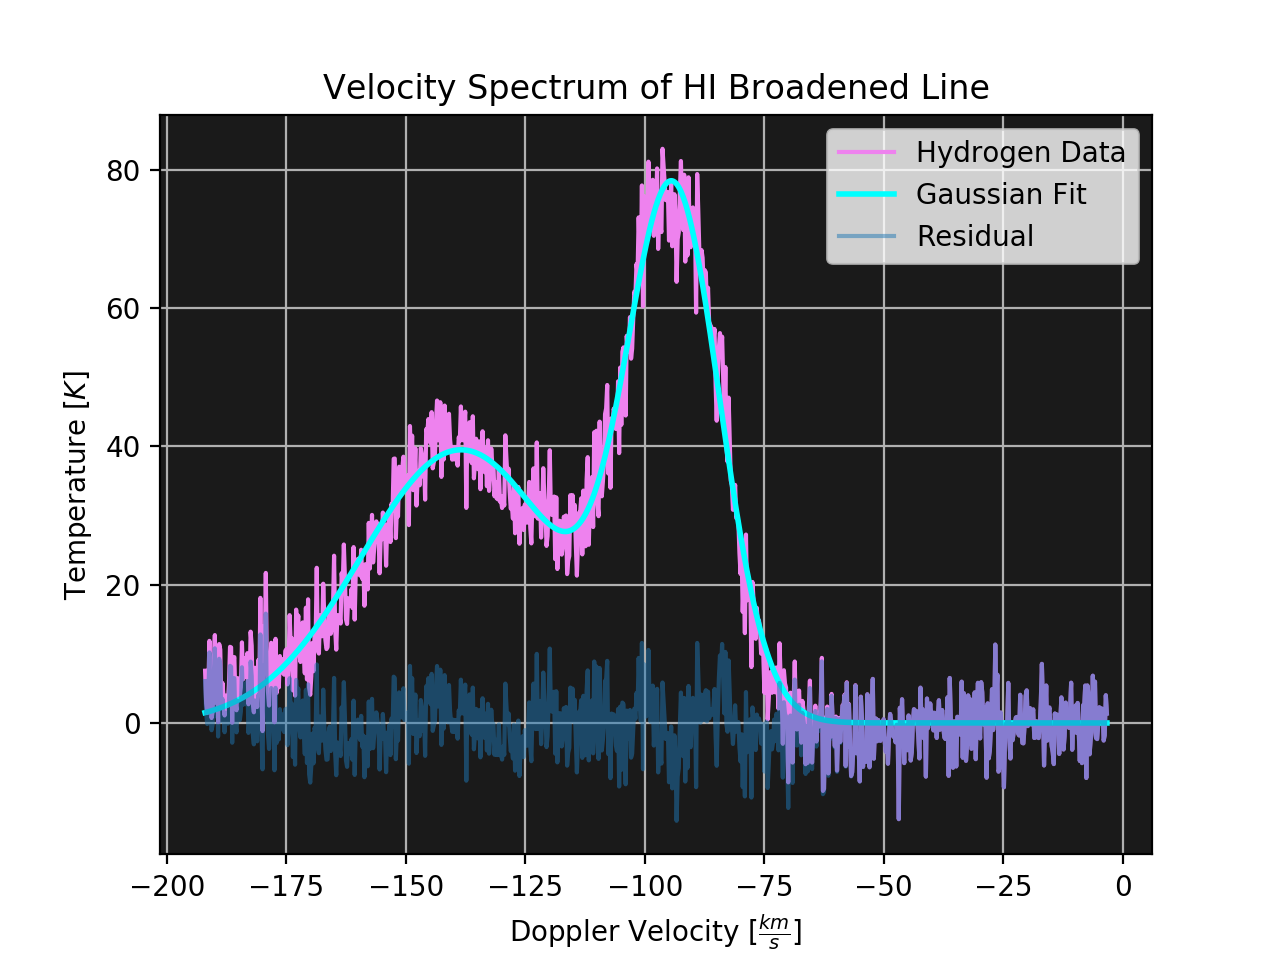

In [108]:
fig, ax = plt.subplots()
ax=plt.gca()
plt.grid()
plt.title('Velocity Spectrum of HI Broadened Line')
plt.xlabel(r'Doppler Velocity [$\frac{km}{s}$]')

plt.ylabel(r'Temperature [$K$]')
plt.plot(v_corr, t_line, color = 'violet',label='Hydrogen Data')
plt.plot(v_corr, gaussian_val, lw=2, color = 'cyan', label='Gaussian Fit')
plt.plot(v_corr, t_line - ugradio.gauss.gaussval(np.array(v_corr), **gaussian_fit), alpha=0.5, label='Residual')
ax.set_facecolor('0.1')
plt.legend()
plt.show()

In [111]:
def chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2)

def reduced_chisq(ys, mdl, sig):
    return np.sum(np.abs(ys-mdl)**2/sig**2) / (len(ys) - 6)
sigma_i = np.std(t_line[-100:])
reduced_chisq(t_line, gaussian_val, sigma_i)

0.8457481409433927

In [110]:
import ugradio
import numpy as np
from astropy import units as u
from astropy import constants as c
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from scipy.optimize import curve_fit



bb_data = pd.read_csv('cal_data.csv')
bb_f = bb_data['f'][93:1840]*1e-6
bb_a = bb_data['a'][93:1840]

sky_data = pd.read_csv('sec8_data.csv')
sky_f = sky_data['f'][93:1840]*1e-6
sky_a = sky_data['a'][93:1840]

s_shape = sky_a / bb_a - 0.565



diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape



v = - bb_f/1420.4 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)
v_corr = v+dop_corr



#truncate the data even more
bb_f = bb_f[890:1723]
bb_a = bb_a[890:1723]

sky_f = sky_f[890:1723]
sky_a = sky_a[890:1723]


s_shape = sky_a / bb_a - 0.558
diff = np.sum(bb_a - sky_a)
G = 300/diff * np.sum(sky_a)
t_line = G * s_shape

v = - bb_f/1420 * c.c.to(u.km/u.s)
dop_corr = ugradio.doppler.get_projected_velocity(151,37.87,22053).to(u.km/u.s)
v_corr = v + dop_corr



gaussian_fit, cov = ugradio.gauss.gaussfit(x = np.array((v+dop_corr)),
                                      y = np.array((t_line)), 
                                      amp = [70, 30], 
                                      avg = [-90, -140], 
                                      sig = [40, 60],
                                     return_cov=True)


gaussian_val = ugradio.gauss.gaussval(np.array(v+dop_corr), 
                                     gaussian_fit['amp'],
                                     gaussian_fit['avg'],
                                     gaussian_fit['sig'])






<IPython.core.display.Javascript object>


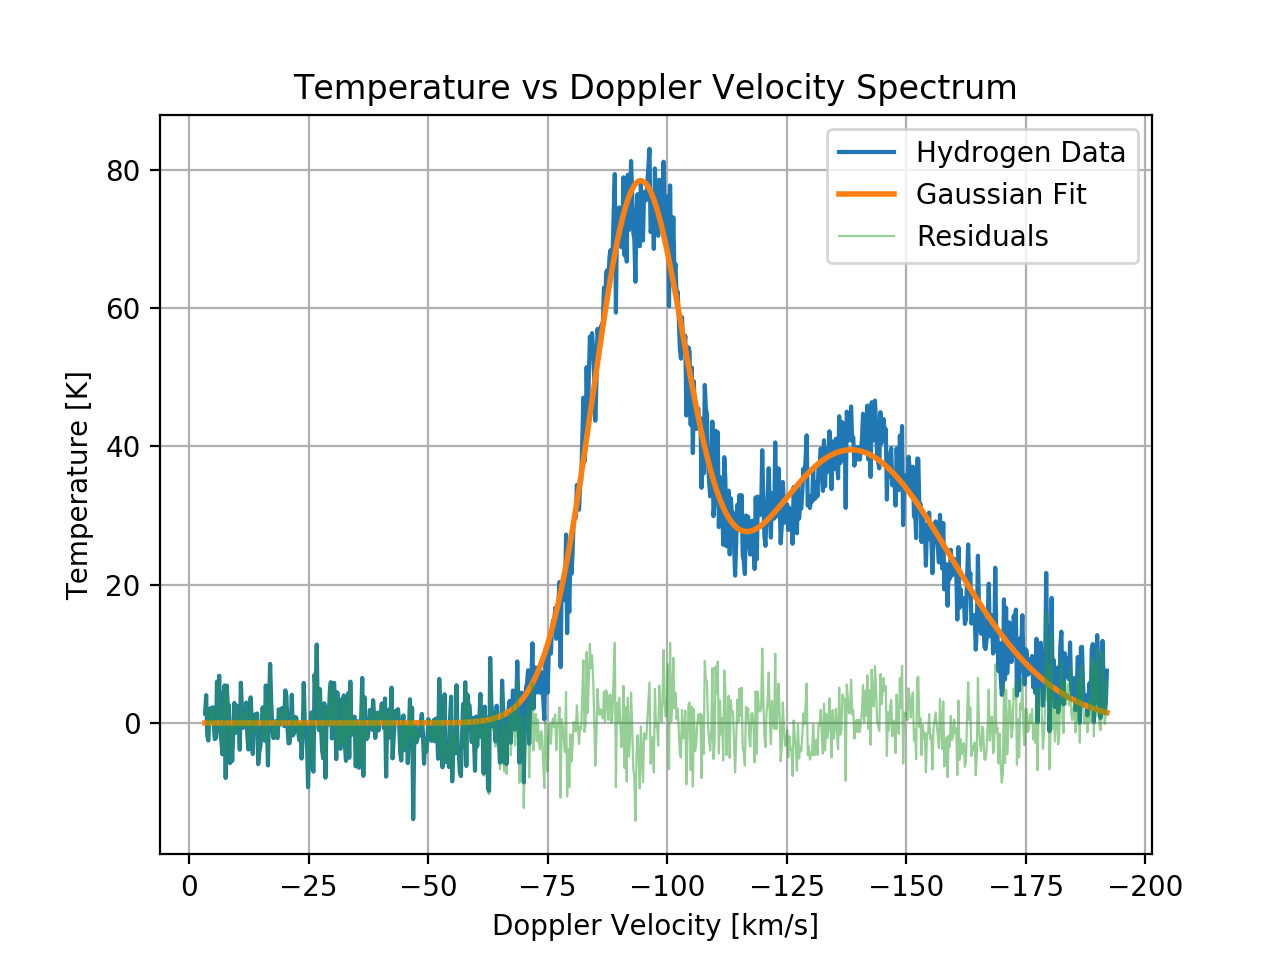

In [107]:


fig, ax = plt.subplots()
plt.grid()
plt.title('Temperature vs Doppler Velocity Spectrum')
plt.xlabel('Doppler Velocity [km/s]')
ax.invert_xaxis()
plt.ylabel('Temperature [K]')
plt.plot(v_corr, t_line, label='Hydrogen Data')
plt.plot(v_corr, gaussian_val, lw=2, label='Gaussian Fit')
plt.plot(v_corr, t_line - ugradio.gauss.gaussval(np.array(v_corr), **gaussian_fit), alpha=0.5, lw=0.8, label='Residuals')
plt.legend()
plt.savefig("Observation_Spectrum.png")



# Gaussian Fitting Stuff

In [98]:
cal1_df = pd.read_csv('cal_data.csv')
cal2_df = pd.read_csv('cal_test_data.csv')
cal3_df = pd.read_csv('cal_test_data2.csv')
cal4_df = pd.read_csv('cal_test_data3.csv')
cal5_df = pd.read_csv('cal_test_data4.csv')
cal6_df = pd.read_csv('cal_test_data5.csv')
rgf_1 = cal1_df['f']
rgf_2 = cal2_df['f']
rgf_3 = cal3_df['f']
rgf_4 = cal4_df['f']
rgf_5 = cal5_df['f']
rgf_6 = cal6_df['f']
rga_1 = cal1_df['a']
rga_2 = cal2_df['a']
rga_3 = cal3_df['a']
rga_4 = cal4_df['a']
rga_5 = cal5_df['a']
rga_6 = cal6_df['a']
#renaming blackbody data and trimming away the illicit frequency hijacking the tail of our spectra
bb_f = cal1_df['f'][:1840]
bb_a = cal1_df['a'][:1840]
#renaming null (wall) data
null_f = cal2_df['f'][:1840]
null_a = cal2_df['a'][:1840]
#renaming sky data
sky_f = cal6_df['f'][:1840]
sky_a = cal6_df['a'][:1840]
# step 1: find C

T_bb = 310  # K
T_cs = 10
P_bb = bb_a
P_cs = sky_a

# do bb minus cs: CS
C = (T_bb - T_cs) / (P_bb - P_cs)  # conversion factor

# we can fit a polynomial to C but let's do the avg for now (0th order polynomial). Should do higher order.
x = null_f
C = (x**2)*4.34002430e-13 + x*-8.63788801e-08 + 5.23798861e-01

#Cmean = np.mean(C)

# step 2: plug C into equation above, solve for D using either the BB or the CS

# CS:
D = T_cs - C * P_cs

# should we fit a polynomial to D? yes
D = (x**2)*-1.36558408e-11 + x*9.49413668e-06 + -4.02773920e+02
# step 3, last step: get T for our measurement of the H1 line

def power2temp(power):
    """
    Convert any power spectrum to temperature in K
    """
    return C * power + D
sec8_temp = power2temp(sec8_a)


#need to lop off the end of the real data arrays as we did our calibration arrays to erase the unwanted radio signal at .8 MHz
sec8 = pd.read_csv('sec8_data.csv')[:1840]
sec8_f_all = sec8['f'][:1840]
sec8_a_all = sec8['a'][:1840]
#also chopping off the massive hump at -.75 MHz to make linear fit to off-line channels more agreeable
sec8_f = sec8_f_all[600:]
sec8_a = sec8_a_all[600:]
Hyd_Temp_all = sec8_temp - np.mean(sec8_temp)
Hyd_Temp = Hyd_Temp_all[600:]
x = sec8_f

#fuck it, I manually chopped off all the data before our Gaussian peaks to skirt the issue entirely
sec8_temp = power2temp(sec8_a)
chopped_Hyd_Temp = Hyd_Temp[600:]
chopped_sec8_f = sec8_f[600:]*1e-6

avg = [np.float(.4),np.float(.65)]
amp = [np.float(50),np.float(100)]
gaussian_fit, cov_matrix = ugradio.gauss.gaussfit(x = np.array((chopped_sec8_f)),
                                      y = np.array((chopped_Hyd_Temp)), 
                                      amp = amp, avg = avg, sig = [.1,.1],
                                                 return_cov = True)
gaussian_val = ugradio.gauss.gaussval(np.array(chopped_sec8_f), amp = np.array([ 45.21939174, 103.52846147]),avg = np.array([0.39580223, 0.67168246]), sig = np.array([0.02592999, 0.09852791]))

In [99]:
gaussian_fit

{'amp': array([ 45.21939174, 103.52846147]),
 'avg': array([0.39580223, 0.67168246]),
 'sig': array([0.02592999, 0.09852791])}

<IPython.core.display.Javascript object>


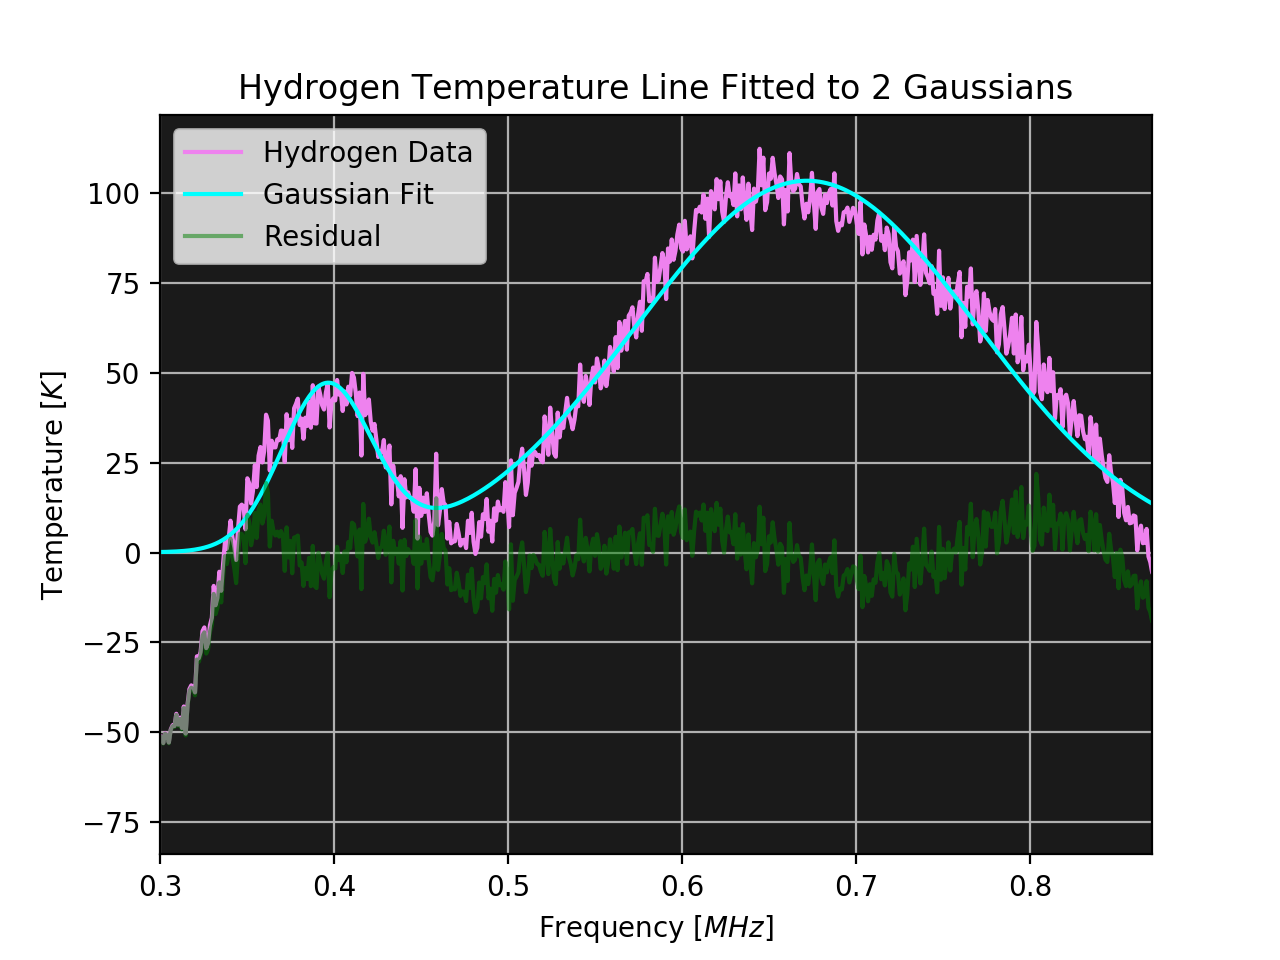

In [100]:
plt.figure()
ax=plt.gca()
plt.plot(chopped_sec8_f, chopped_Hyd_Temp, label = 'Hydrogen Data', color = 'violet')
plt.plot(chopped_sec8_f,gaussian_val, label = 'Gaussian Fit', color = 'cyan')
plt.plot(chopped_sec8_f, chopped_Hyd_Temp - ugradio.gauss.gaussval(np.array(chopped_sec8_f), **gaussian_fit), alpha=0.5, label='Residual', color = 'green')
plt.xlim(.3,.87)
plt.xlabel(r"Frequency [$MHz$]")
plt.ylabel(r"Temperature [$K$]")
plt.title("Hydrogen Temperature Line Fitted to 2 Gaussians")
ax.set_facecolor('0.1')
plt.legend()
plt.grid()
plt.show()

In [101]:
sigma_i = np.std(chopped_Hyd_Temp[-100:])
reduced_chisq(chopped_Hyd_Temp, gaussian_val, sigma_i)

1.558435041629051

In [56]:
cov_matrix

array([[ 2.82094440e+01,  1.25617648e-04, -1.05848243e-02,
         4.19688126e-01,  1.87227344e-04, -8.51746478e-04],
       [ 1.25617648e-04,  1.25519137e-05,  2.98937873e-07,
         5.64715118e-04,  5.92941575e-07, -1.37195654e-06],
       [-1.05848243e-02,  2.98937873e-07,  1.27253819e-05,
         7.56440997e-04,  7.77454148e-07, -1.83275699e-06],
       [ 4.19688126e-01,  5.64715118e-04,  7.56440997e-04,
         7.66136240e+00, -3.64660644e-05, -5.31011889e-03],
       [ 1.87227344e-04,  5.92941575e-07,  7.77454148e-07,
        -3.64660644e-05,  9.22150752e-06,  9.21505649e-08],
       [-8.51746478e-04, -1.37195654e-06, -1.83275699e-06,
        -5.31011889e-03,  9.21505649e-08,  1.03962107e-05]])

In [81]:
amp1_error = cov_matrix[0][0]**(1/2)
amp2_error = cov_matrix[1][1]**(1/2)
avg1_error = cov_matrix[2][2]**(1/2)
avg2_error = cov_matrix[3][3]**(1/2)
sig1_error = cov_matrix[4][4]**(1/2)
sig2_error = cov_matrix[5][5]**(1/2)

In [82]:
print(amp1_error,amp2_error,avg1_error,avg2_error,sig1_error,sig2_error)

5.31125635209505 0.0035428679993896647 0.003567265329679978 2.7679166168932396 0.0030366935179268364 0.003224315538982708


<IPython.core.display.Javascript object>


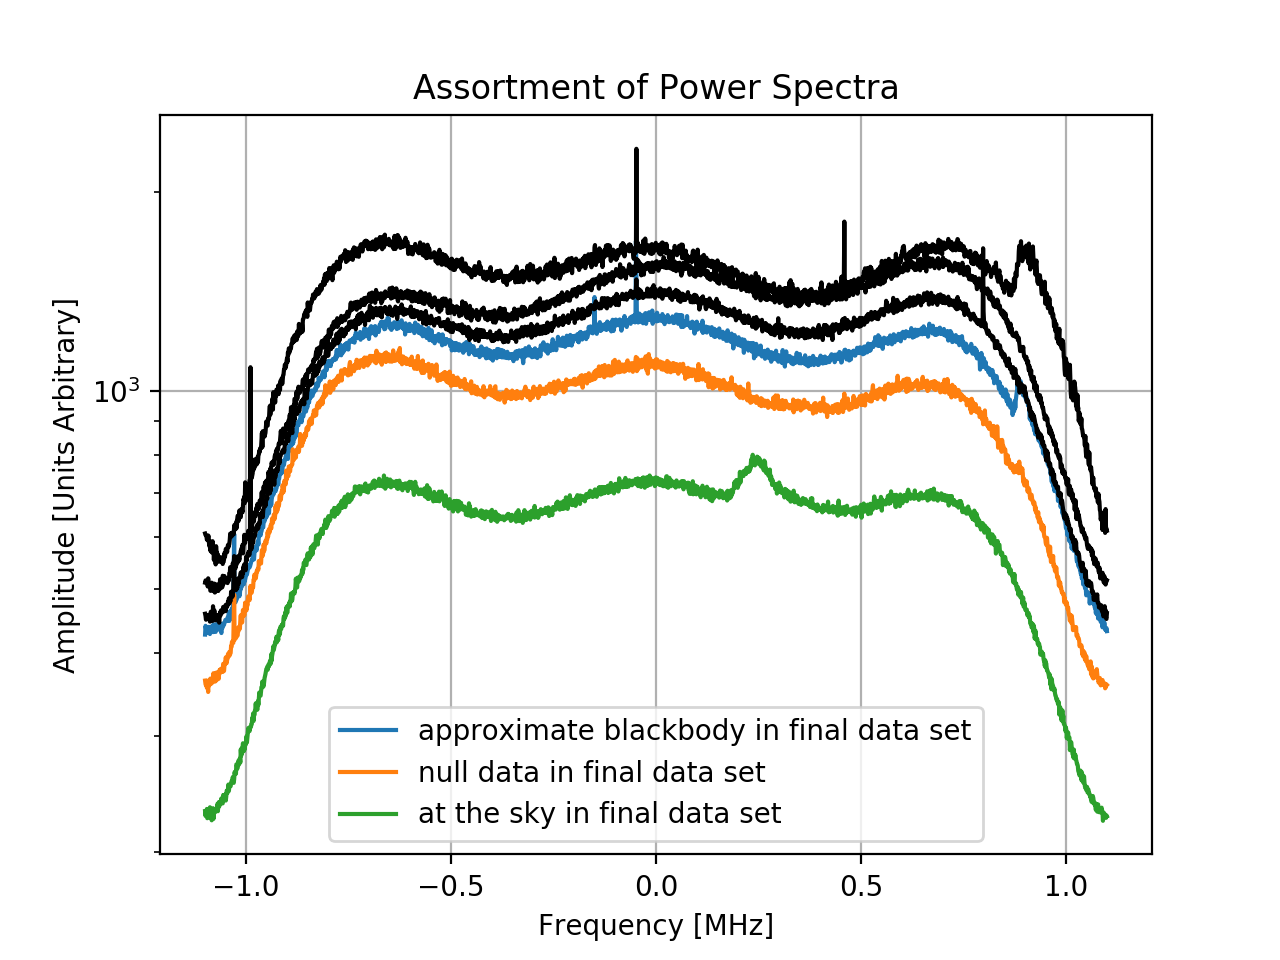

In [53]:
plt.figure()
plt.grid()
plt.title('Assortment of Power Spectra')
plt.xlabel('Frequency [MHz]')
plt.ylabel('Amplitude [Units Arbitrary]')
plt.semilogy(rgf_1*1e-6, rga_1, label = "approximate blackbody in final data set")
plt.semilogy(rgf_2*1e-6, rga_2, label = "null data in final data set")
plt.semilogy(rgf_3*1e-6, rga_3, color = 'k')
plt.semilogy(rgf_4*1e-6, rga_4, color = 'k')
plt.semilogy(rgf_5*1e-6, rga_5, color = 'k')
plt.semilogy(rgf_6*1e-6, rga_6, label = "at the sky in final data set")

plt.legend()
plt.show()

<IPython.core.display.Javascript object>


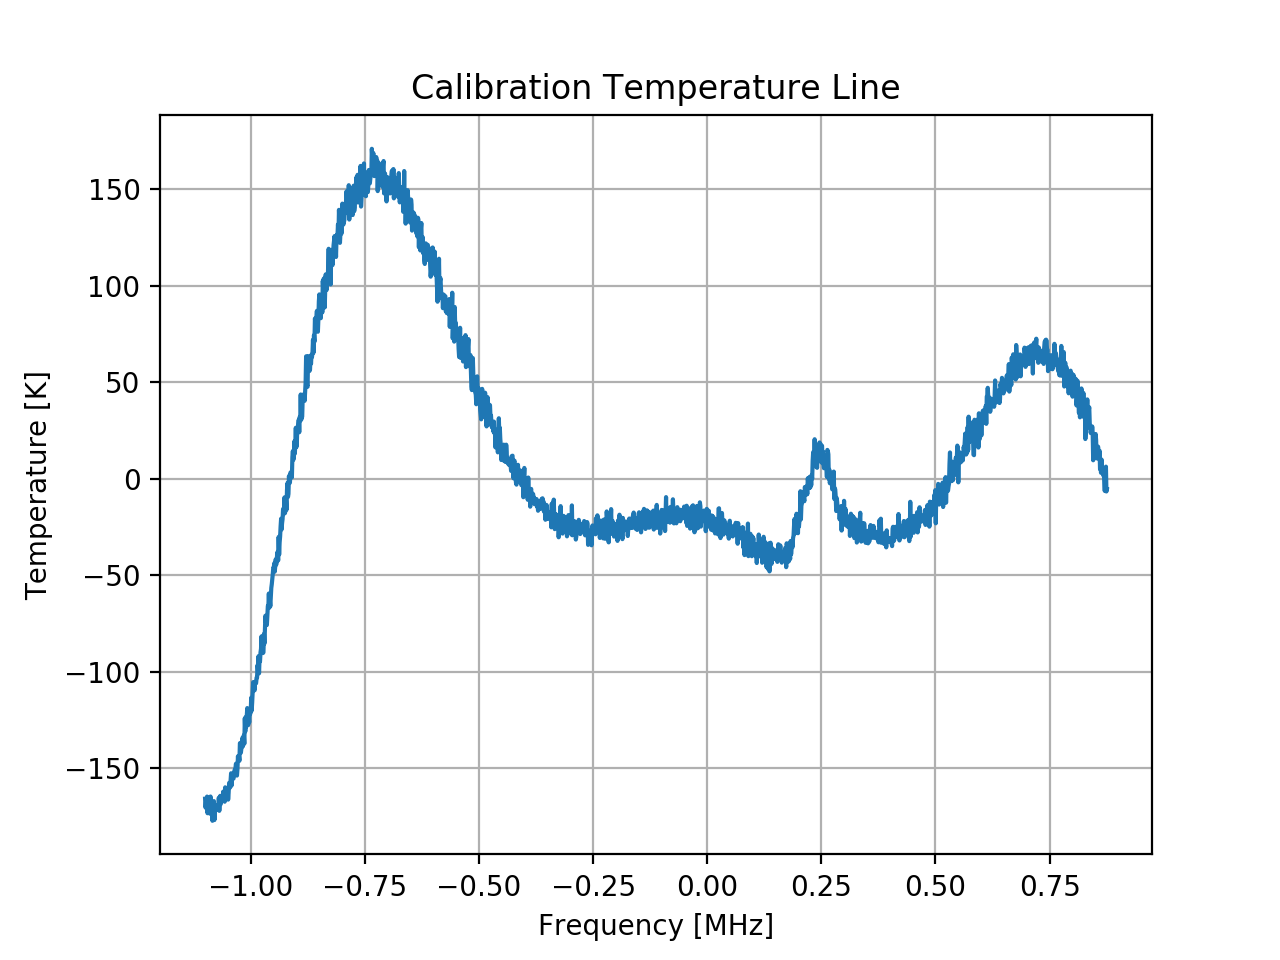

In [60]:
example = power2temp(sky_a)

plt.figure()
plt.plot(null_f*1e-6, example)
plt.xlabel("Frequency [MHz]")
plt.ylabel("Temperature [K]")
plt.title("Calibration Temperature Line")
plt.grid()
plt.show()